## Update Authorization Token

In [214]:
import yaml

with open("strava.yml", 'r') as stream:
    data_loaded = yaml.safe_load(stream)

client_id=data_loaded['client_id']
client_secret=data_loaded['client_secret']

In [215]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# the authorization url
auth_url = "https://www.strava.com/oauth/token"
#activites_url = "https://www.strava.com/api/v3/athlete/activities"
#athlete_url = "https://www.strava.com/api/v3/athlete/"

# payload to get rereshed strava authorization token
payload = {
    'client_id': client_id,
    'client_secret': client_secret,
    'refresh_token': '90cc6b363aa7fa8d93dcc24dd94fdad1661f5ca5',
    'grant_type': "refresh_token",
    'f': 'json'
}

# request the token
print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
print(res)
# access token will be embedded in json
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

'''
header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 20, 'page': 1}
my_dataset = requests.get(athlete_url, headers=header, params=param).json()


#print(my_dataset[0]["name"])
#print(my_dataset[0]["map"]["summary_polyline"])

print(my_dataset)
'''

Requesting Token...

<Response [200]>
Access Token = 02d12297f947f24c75a29a057c17e7e3292d46ca



'\nheader = {\'Authorization\': \'Bearer \' + access_token}\nparam = {\'per_page\': 20, \'page\': 1}\nmy_dataset = requests.get(athlete_url, headers=header, params=param).json()\n\n\n#print(my_dataset[0]["name"])\n#print(my_dataset[0]["map"]["summary_polyline"])\n\nprint(my_dataset)\n'

# Authorize an athlete

This block shows how to get an athlete to aurthorize an app

NOTE:  BLOCK WILL NOT RUN UNLESS YOU UPDATE THE 'code' BY POSTING THE AURORIZATION URL INTO A WEB BROWSER

In [217]:
# see https://groups.google.com/g/strava-api/c/XbQJrQOm9Dg

# put this in browser to get authorization code for all activities 
# https://www.strava.com/oauth/authorize?redirect_uri=http://localhost:5744/&response_type=code&scope=read,read_all,activity:read,activity:read_all,profile:read_all&client_id=77193

# payload to get authorization code from athlete
payload = {
    'client_id': client_id,
    'client_secret': client_secret,
    ####### UPDATE THE CODE BELOW BY FOLLOWING INSTRUCTION AT TOP OF BLOCK
    'code': 'f560aa3f690a2a066a27e7ca8653847a42b5fc29',
    'grant_type': "authorization_code",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
print(res.json())
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

Requesting Token...

{'token_type': 'Bearer', 'expires_at': 1643477851, 'expires_in': 17096, 'refresh_token': 'cbaa2eedb6cf4b5a0870db181f487b7729cb830e', 'access_token': '607d495b8d4a72d3ce1ed05fb9e9c5b6fa8dda81', 'athlete': {'id': 35084665, 'username': None, 'resource_state': 2, 'firstname': 'Brian', 'lastname': 'Northan', 'bio': None, 'city': None, 'state': None, 'country': None, 'sex': 'M', 'premium': False, 'summit': False, 'created_at': '2018-09-22T23:16:50Z', 'updated_at': '2021-02-20T23:05:42Z', 'badge_type_id': 0, 'weight': 0.0, 'profile_medium': 'https://graph.facebook.com/10152354161655867/picture?height=256&width=256', 'profile': 'https://graph.facebook.com/10152354161655867/picture?height=256&width=256', 'friend': None, 'follower': None}}
Access Token = 607d495b8d4a72d3ce1ed05fb9e9c5b6fa8dda81



## Get an Athlete

In [191]:
header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 20, 'page': 1, 'segment_id':18901378}

_url = "https://www.strava.com/api/v3/athlete/"
my_dataset = requests.get(_url, headers=header, params=param).json()

print(my_dataset)

{'id': 35084665, 'username': None, 'resource_state': 3, 'firstname': 'Brian', 'lastname': 'Northan', 'bio': None, 'city': None, 'state': None, 'country': None, 'sex': 'M', 'premium': False, 'summit': False, 'created_at': '2018-09-22T23:16:50Z', 'updated_at': '2021-02-20T23:05:42Z', 'badge_type_id': 0, 'weight': 0.0, 'profile_medium': 'https://graph.facebook.com/10152354161655867/picture?height=256&width=256', 'profile': 'https://graph.facebook.com/10152354161655867/picture?height=256&width=256', 'friend': None, 'follower': None, 'blocked': False, 'can_follow': True, 'follower_count': 90, 'friend_count': 66, 'mutual_friend_count': 0, 'athlete_type': 1, 'date_preference': '%m/%d/%Y', 'measurement_preference': 'feet', 'clubs': [{'id': 35283, 'resource_state': 2, 'name': 'Hudson Mohawk Road Runners Club', 'profile_medium': 'https://dgalywyr863hv.cloudfront.net/pictures/clubs/35283/996650/2/medium.jpg', 'profile': 'https://dgalywyr863hv.cloudfront.net/pictures/clubs/35283/996650/2/large.jpg

## Get an Activity

In [201]:
header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 20, 'page': 1, 'segment_id':18901378}

# all activities
_url = "https://www.strava.com/api/v3/athlete/activities"
# specific activity
#_url="https://www.strava.com/api/v3/activities/6226919392"
_url="https://www.strava.com/api/v3/activities/5163528751/"

my_dataset = requests.get(_url, headers=header, params=param).json()

print(my_dataset)

{'resource_state': 3, 'athlete': {'id': 35084665, 'resource_state': 1}, 'name': 'Evening Run', 'distance': 5368.3, 'moving_time': 1760, 'elapsed_time': 1760, 'total_elevation_gain': 335.9, 'type': 'Run', 'workout_type': None, 'id': 5163528751, 'start_date': '2021-04-20T22:07:01Z', 'start_date_local': '2021-04-20T18:07:01Z', 'timezone': '(GMT-05:00) America/New_York', 'utc_offset': -14400.0, 'location_city': None, 'location_state': None, 'location_country': None, 'achievement_count': 3, 'kudos_count': 8, 'comment_count': 0, 'athlete_count': 1, 'photo_count': 0, 'map': {'id': 'a5163528751', 'polyline': 'utccGnenbMb@dANRzAdApAfA`@^PTfEnE`CrBrDvDpCtBb@h@r@n@`@VNBrBIlADb@D`@Rd@Ld@QRONEFn@GpADt@d@xC?p@En@Mr@Md@k@v@q@j@QHKP]^c@RkA^sBXgAViA^kARqBh@m@JkE~@uANmA^c@TaAn@_CjB_An@a@Va@PkC~Ac@LuCvAiAVMJh@?d@If@FJf@a@Va@P_@^gA|B[f@e@`A]d@e@Rc@Le@De@@wBVqAH[@cC`@oAJu@Lg@@cAHg@Jc@VaAr@qAZUNm@b@{@x@c@V]Xi@R_@Za@R]^SH]TQPu@f@e@Tg@Je@Dc@Le@V[b@On@KfBUdBSbA_@fAy@jBSl@?v@_@nCKn@]`AIJg@`@[b@cBh@wEZc@@i@FiA^a

Segments in Activity

In [202]:
for segment in my_dataset['segment_efforts']:
    print(segment['name'],segment['distance']/1608)

#my_dataset['segment_efforts'][2]['name']

Old Road climb 0.5734452736318408
Thacher climb 3.291293532338308
Pinnacle Road Hill Climb 0.23351990049751245


## Get Splits from Activity

In [206]:
splits=my_dataset['splits_standard']

import math
i=1
for split in splits:
    minutes=math.floor(split['elapsed_time']/60)
    seconds=split['elapsed_time']%60
    print('split',i,str(minutes)+':'+str(seconds))
    i=i+1

split 1 8:57
split 2 8:23
split 3 8:47
split 4 3:13


## Get Segments (need to pay??)

In [198]:
header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 20, 'page': 1, 'segment_id':18901378}

_url = "https://www.strava.com/api/v3/segment_efforts/"

my_dataset = requests.get(_url, headers=header, params=param).json()

print(my_dataset)

{'message': 'Payment Required', 'errors': []}


In [221]:
# get all activities
header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 20, 'page': 1, 'segment_id':18901378}

_url = "https://www.strava.com/api/v3/athlete/activities"

my_dataset = requests.get(_url, headers=header, params=param).json()

print(type(my_dataset))

print(len(my_dataset))

<class 'list'>
20


In [225]:
i=1
for data in my_dataset:
    print('workout',i,'was a',data['type'])
    i=i+1

workout 1 was a Workout
workout 2 was a Workout
workout 3 was a Workout
workout 4 was a Workout
workout 5 was a Workout
workout 6 was a Workout
workout 7 was a Run
workout 8 was a Workout
workout 9 was a NordicSki
workout 10 was a Workout
workout 11 was a NordicSki
workout 12 was a Workout
workout 13 was a Workout
workout 14 was a Workout
workout 15 was a NordicSki
workout 16 was a Workout
workout 17 was a NordicSki
workout 18 was a Run
workout 19 was a Workout
workout 20 was a Workout


In [223]:
for key in my_dataset[0]:
    print(key)

resource_state
athlete
name
distance
moving_time
elapsed_time
total_elevation_gain
type
id
start_date
start_date_local
timezone
utc_offset
location_city
location_state
location_country
achievement_count
kudos_count
comment_count
athlete_count
photo_count
map
trainer
commute
manual
private
visibility
flagged
gear_id
start_latlng
end_latlng
start_latitude
start_longitude
average_speed
max_speed
average_cadence
has_heartrate
average_heartrate
max_heartrate
heartrate_opt_out
display_hide_heartrate_option
elev_high
elev_low
upload_id
upload_id_str
external_id
from_accepted_tag
pr_count
total_photo_count
has_kudoed


In [148]:
type(my_dataset[0]['map'])

dict

In [149]:
for key in my_dataset[0]['map']:
    print(key)

id
summary_polyline
resource_state


In [150]:
test=my_dataset[0]['map']['summary_polyline']

In [152]:
test

'mvrcGjrebME^u@fB[x@c@x@_@d@c@ZE?[AUOgA_Co@iASs@Gs@Im@Wy@w@W}@f@O?qAa@SYMYb@gB\\q@Ci@Ia@kA{Ds@iBgAyCQm@w@cDs@eBa@q@gAOyA`@oAv@o@fBCVB`@l@z@f@VTVNXHZ@VKxBD|@f@~BRvCHb@Zz@VvBd@pBZ^XRjBx@tBhARHp@`@lA`A`@Ph@Fr@EzA_@xA@vAR\\BtAr@HzA~@xArAh@|A]nB[|AKZFt@~AJfA?\\EFMF]C}@Ju@TUDwBF{ALuANQXD\\B@D@LGf@q@TUNGbBOd@AfAOjBe@p@Dp@Pp@l@XFb@?dBQ|A[dCs@`@Oz@e@RWNk@TyBj@eEj@kBz@qAPa@H]D[O}BYw@}@}@yACqAu@}AJ_BBcEVaA?w@W{Bi@yA?i@HcA{@OI[IiC[aAc@c@c@e@cAqAyDm@mBw@{CQg@aAeE}@uB_EoIw@qAi@WEBQRCJd@lBz@dArA~Bb@b@^Vb@p@fCdDl@xCfA`EtB`HXr@\\b@nAf@|APv@BdAbAi@nBcAxAu@h@k@V?BbAy@fAiA\\y@P}ACEy@k@iAI}ASqA_Aa@_AyCgJi@mB}@gEQWw@i@_A_BoA_AwC_G@aB^CXPHJxA`CpBhEvAjDf@|A\\xA^pBjCtIx@|BdAfAXHvD\\THNJb@n@NBd@Mj@I\\@TD~DfAfB@hAUdAMjACf@@`AEr@Lx@f@vAD`@ZPd@H`@NfBAn@Gf@w@`Bs@fA]lA_AvGI\\o@bBeAl@_AZcAXyAVsARyAMe@W]]i@I_ABoAb@}AL}ADqAh@e@f@Si@Za@vASlAK`BM`@?b@IxA_@`AB?Mc@oBM[SOQI{ADuDj@kA@y@{@}@wAIa@Go@IQSKq@M_BGyAKgAT}APsAm@cA}@}Am@oAm@sAw@mA_Ai@wAM{AOcAm@gBUeDi@uBGeB@aBCOIOcAsASQMWFgB~@mArAo@xAMxAJx@xAp@jB^zBf@nBfBnFXlAL^RfACp@

In [157]:
import polyline

In [159]:
test2=polyline.decode(test)

In [160]:
len(test2)

331

In [163]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 6.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [169]:
import pandas as pd

df = pd.DataFrame(test2, columns=['long','lat'])

In [171]:
help(gpd.plotting.plot_dataframe)

Help on function plot_dataframe in module geopandas.plotting:

plot_dataframe(df, column=None, cmap=None, color=None, ax=None, cax=None, categorical=False, legend=False, scheme=None, k=5, vmin=None, vmax=None, markersize=None, figsize=None, legend_kwds=None, categories=None, classification_kwds=None, missing_kwds=None, aspect='auto', **style_kwds)
    Plot a GeoDataFrame.
    
    Generate a plot of a GeoDataFrame with matplotlib.  If a
    column is specified, the plot coloring will be based on values
    in that column.
    
    Parameters
    ----------
    column : str, np.array, pd.Series (default None)
        The name of the dataframe column, np.array, or pd.Series to be plotted.
        If np.array or pd.Series are used then it must have same length as
        dataframe. Values are used to color the plot. Ignored if `color` is
        also set.
    kind: str
        The kind of plots to produce:
         - 'geo': Map (default)
         Pandas Kinds
         - 'line' : line plot

In [174]:
df.head()

,long,lat
0,42.69943,-73.92566
1,42.69946,-73.92582
2,42.69973,-73.92634
3,42.69987,-73.92663
4,42.70005,-73.92692


In [175]:
from shapely.geometry import Point

In [183]:
geometry=[Point(xy) for xy in zip(df['lat'],df['long'])]

In [184]:
crs={'init': 'epsg:4326'}
geo_df=gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

/home/bnorthan/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

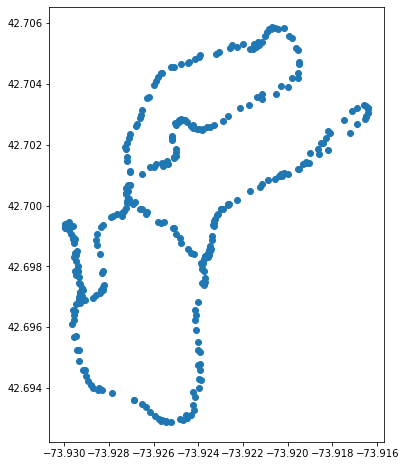

In [186]:
gpd.plotting.plot_dataframe(geo_df,figsize=(10,8))

In [ ]:
gpd.plotting.